In [1]:
# pip install <'plotly', 'cufflinks', 'folium', 'nodejs', in terminal -> @jupyterlab/plotly-extension >


%matplotlib inline 
# 'Magic function'
# Команда %matplotlib inline указывает, что график необходимо построить все в той же оболочке Jupyter, 
# но теперь он выводится как обычная картинка. 
# Данный способ удобен тем, что позволяет проводить очень много экспериментов в рамках одного окна (точнее web-страницы). 
# В этом статическом режиме, никакие изменения не отобразятся до тех пор пока не будет выполнена команда plt.show()

# Кстати, магические команды, так же как и команды импорта библиотек, 
# распространяются на весь блокнот (и все его ячейки), поэтому, команды: %matplotlib, %matplotlib notebook и %matplotlib inline 
# достаточно указывать один раз в самой первой ячейке.

import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style # gallery of stylesheets defined in Matplotlib
                             #style.use('ggplot')

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=(10,7)


import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium 

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel(r"./data_for_projects/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/Covid cases in India.xlsx")

df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [4]:
df.drop(['S. No.'], axis = 1, inplace=True)

In [5]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [6]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [7]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [8]:
print(f"The total number of cases till now in India is {df['Total Cases'].sum()}")

The total number of cases till now in India is 729


In [9]:
df.head().style.background_gradient(cmap='Blues') # Gradient in column highcharts

df['Active Cases'] = df['Total Cases'] - (df['Cured'] + df['Death'])

In [10]:
Total_Active_Cases= df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [11]:
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [12]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [13]:
# Graphical Representation

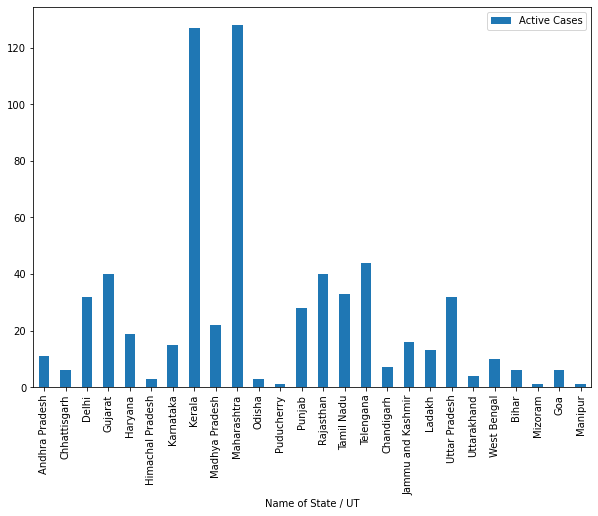

In [14]:
# Pandas visualization
df.plot(kind='bar', x='Name of State / UT', y='Active Cases')

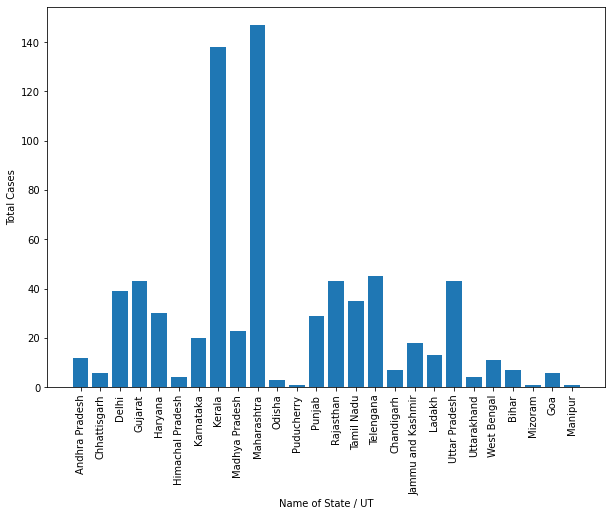

In [15]:
# Matplotlib visualization
plt.bar(df['Name of State / UT'], df['Total Cases'])
plt.xlabel('Name of State / UT')
plt.ylabel('Total Cases')
plt.xticks(df['Name of State / UT'], rotation='vertical', size=10)
plt.show()

In [17]:
# Plotly visualization
df.iplot(kind='bar', x='Name of State / UT', y='Active Cases')